## Интеллектуальный анализ данных – весна 2025
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

* Если в задании есть вопрос на рассуждение, то за отсутствие ответа на него балл за задание будет снижен вполовину.

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать с усеченным датасетом `Palmer Penguins`, содержащим информацию о характеристиках трех видов пингвинов: `Adelie`, `Chinstrap` и `Gentoo`:



*   Species — вид пингвина (целевая переменная).
*   Island — остров, на котором была сделана запись.
*   Clutch Completion — завершенность кладки яиц.
*   Date Egg — закодированная дата откладки яиц (число дней от самой ранней даты в данных).
*   Culmen Length (mm) — длина клюва.
*   Culmen Depth (mm) — глубина клюва.
*   Flipper Length (mm) — длина ласт.
*   Body Mass (g) — масса тела в граммах.
*   Sex — пол особи.
*   Delta 15 N (o/oo) и Delta 13 C (o/oo) — изотопные значения, характеризующие пищевые предпочтения.

Описание полного набора данных и дополнительную информацию о проекте можно найти [здесь](https://allisonhorst.github.io/palmerpenguins/index.html) и [здесь](https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data?resource=download).

![Palmer Penguins](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)



In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [183]:
data = pd.read_csv('penguins_data.csv')
data.head(10)

,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Chinstrap,Dream,Yes,382,50.9,19.1,196.0,3550.0,MALE,10.02372,-24.86594
1,Chinstrap,Dream,Yes,741,45.2,17.8,198.0,3950.0,FEMALE,8.88942,-24.49433
2,Gentoo,Biscoe,Yes,744,46.5,13.5,210.0,4550.0,FEMALE,7.99530,-25.32829
3,Chinstrap,Dream,Yes,10,45.2,16.6,191.0,3250.0,FEMALE,9.62357,-24.78984
4,Gentoo,Biscoe,Yes,13,48.4,14.4,203.0,4625.0,FEMALE,8.16582,-26.13971
5,Gentoo,Biscoe,Yes,22,48.1,15.1,209.0,5500.0,MALE,8.45738,-26.22664
6,Gentoo,Biscoe,Yes,13,51.1,16.5,225.0,5250.0,MALE,8.20660,-26.36863
7,Gentoo,Biscoe,No,392,42.7,13.7,208.0,3950.0,FEMALE,8.14567,-26.59467
8,Adelie,Biscoe,Yes,14,39.6,20.7,191.0,3900.0,FEMALE,8.80967,-26.78958
9,Gentoo,Biscoe,Yes,735,46.1,13.2,211.0,4500.0,FEMALE,7.99300,-25.51390


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные признаки? Если да, то закодируйте их самым оптимальным способом. Аргументируйте свой выбор.

In [184]:

blanks = data.isnull().sum().sum()
# blanks = 45 => есть 45 пропусков'
data = data.dropna()
# теперь нет

categorial = data.select_dtypes(['object', 'category'])
categorial = categorial.drop('Species', axis=1)
print(categorial)
# категориальные признаки
print(categorial.nunique())
# небольшое кол-во уникальных значаний => используем one hot encoding для Island, Sex
# для Clutch Competition всего 2 значения => можно лишь поменять их на 0 и 1

data = pd.get_dummies(data, columns=['Island', 'Sex'], dtype=int)
data['Clutch Completion'] = new_data['Clutch Completion'].replace({'Yes': 1, 'No': 0})

encoder = OrdinalEncoder(categories=[['Gentoo', 'Adelie', 'Chinstrap']])
encoder.fit(data[['Species']])
data['Species'] = encoder.transform(data[['Species']])
data['Species'] = data['Species'].astype(int)

data



        Island Clutch Completion     Sex
0        Dream               Yes    MALE
1        Dream               Yes  FEMALE
2       Biscoe               Yes  FEMALE
3        Dream               Yes  FEMALE
4       Biscoe               Yes  FEMALE
..         ...               ...     ...
339      Dream               Yes  FEMALE
340  Torgersen               Yes    MALE
341     Biscoe               Yes  FEMALE
342     Biscoe               Yes  FEMALE
343     Biscoe               Yes  FEMALE

[325 rows x 3 columns]
Island               3
Clutch Completion    2
Sex                  3
dtype: int64


,Species,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen,Sex_.,Sex_FEMALE,Sex_MALE
0,2,1,382,50.9,19.1,196.0,3550.0,10.02372,-24.86594,0,1,0,0,0,1
1,2,1,741,45.2,17.8,198.0,3950.0,8.88942,-24.49433,0,1,0,0,1,0
2,0,1,744,46.5,13.5,210.0,4550.0,7.99530,-25.32829,1,0,0,0,1,0
3,2,1,10,45.2,16.6,191.0,3250.0,9.62357,-24.78984,0,1,0,0,1,0
4,0,1,13,48.4,14.4,203.0,4625.0,8.16582,-26.13971,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,2,1,382,47.6,18.3,195.0,3850.0,8.83502,-24.65859,0,1,0,0,1,0
340,1,1,382,39.7,18.4,190.0,3900.0,9.29808,-25.23453,0,0,1,0,0,1
341,1,1,16,38.6,17.2,199.0,3750.0,8.77322,-26.48973,1,0,0,0,1,0
342,0,1,392,46.6,14.2,210.0,4850.0,8.38289,-26.86352,1,0,0,0,1,0


Целевую категориальную переменную закодируйте в ординальном порядке: Chinstrap = 0, Gentoo = 1, Adelie = 2. Можно воспользоваться [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html).

Теперь сохраним информацию о признаках в переменную
`X`, а о целевой переменной – в переменную `y`.

In [185]:
x = data.drop('Species', axis=1)
y = data['Species']


**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

In [186]:
np.random.seed(66)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)

важно использовать strtify при разбиении, так как она гарантирует одинаковое распределение классов в тестовой и тренировочной выборках

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака:  `Flipper Length (mm)` и `Body Mass (g)`  – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [150]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train[['Flipper Length (mm)', 'Body Mass (g)']])
x_test_scaled = scaler.transform(x_test[['Flipper Length (mm)', 'Body Mass (g)']])

classifiers = []
for n in [1, 3, 5, 10, 15, 25]:

  knn = KNeighborsClassifier(n_neighbors=n, metric='euclidean')
  knn.fit(x_train_scaled, y_train)
  classifiers.append(knn)

  y_train_pred = knn.predict(x_train_scaled)
  y_test_pred = knn.predict(x_test_scaled)

  train_accuracy = accuracy_score(y_train, y_train_pred)
  test_accuracy = accuracy_score(y_test, y_test_pred)

  print(f'{n} соседей: ', train_accuracy, test_accuracy)


1 соседей:  0.9823788546255506 0.7142857142857143
3 соседей:  0.8810572687224669 0.7653061224489796
5 соседей:  0.8546255506607929 0.7653061224489796
10 соседей:  0.8370044052863436 0.7755102040816326
15 соседей:  0.8325991189427313 0.7959183673469388
25 соседей:  0.8281938325991189 0.7959183673469388


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [66]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [82]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

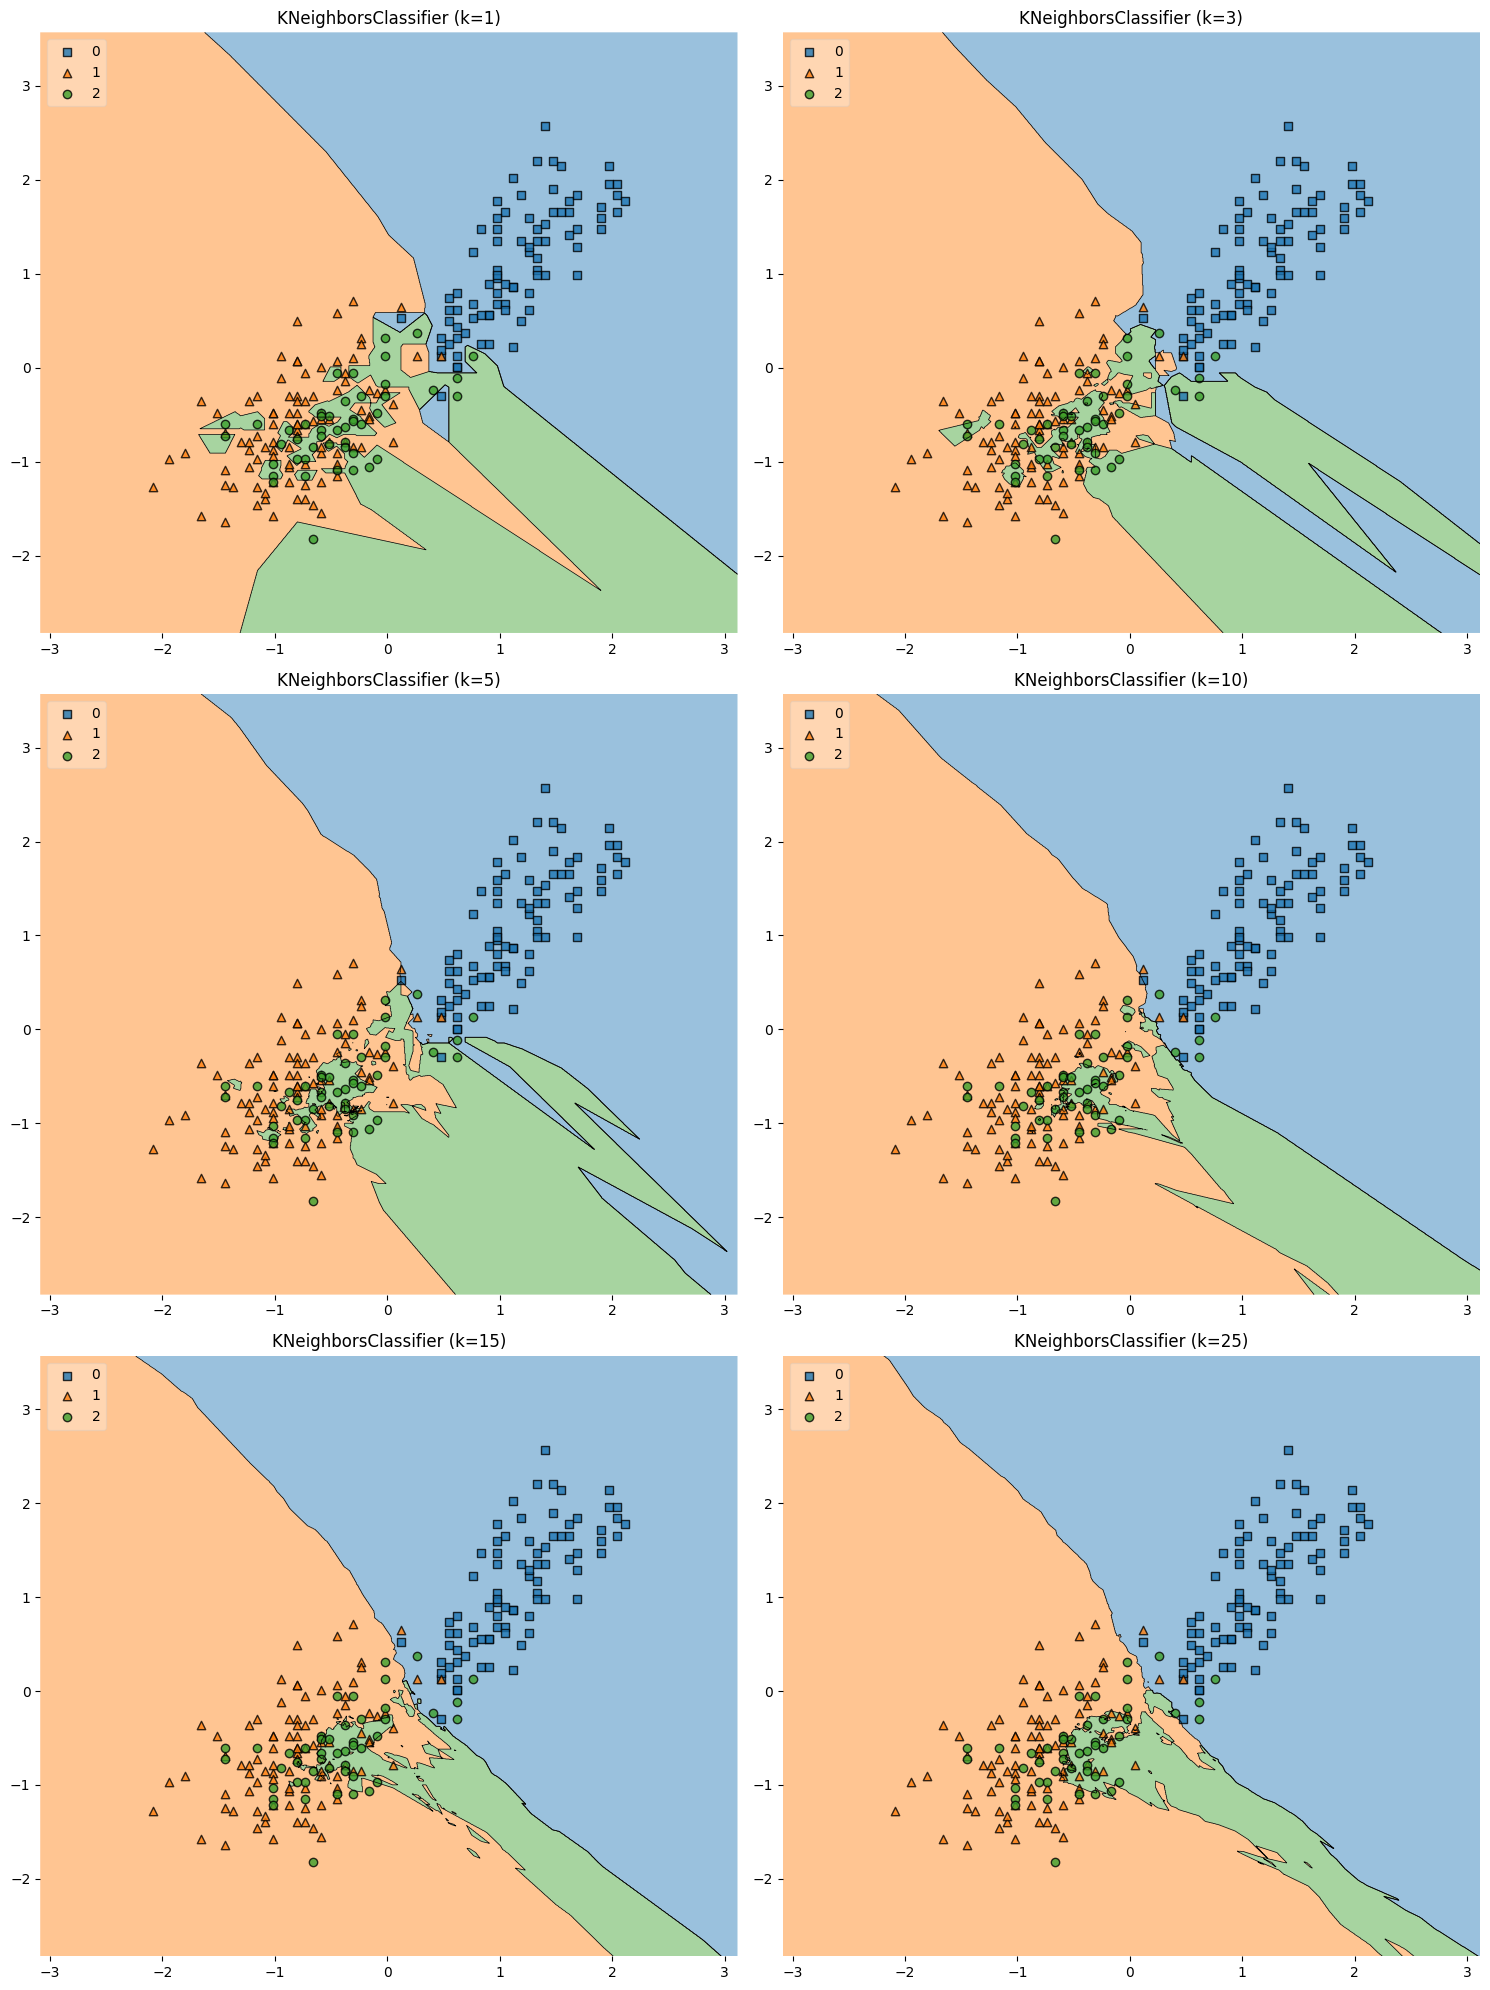

In [106]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(3, 2)
fig = plt.figure(figsize=(15, 20))

X_vis = x_train_scaled
y_vis = y_train.values

labels = [
    'KNeighborsClassifier (k=1)',
    'KNeighborsClassifier (k=3)',
    'KNeighborsClassifier (k=5)',
    'KNeighborsClassifier (k=10)',
    'KNeighborsClassifier (k=15)',
    'KNeighborsClassifier (k=25)'
]

for clf, lab, grd in zip(classifiers, labels, itertools.product([0, 1, 2], [0, 1])):
    clf.fit(X_vis, y_vis)
    ax = plt.subplot(gs[grd[0], grd[1]])

    plot_decision_regions(
        X=X_vis,
        y=y_vis,
        clf=clf,
        legend=2,
        ax=ax
    )
    plt.title(lab)

plt.tight_layout()
plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

In [108]:
                    #        |||||||||||||||||||||
                    #        vvvvvvvvvvvvvvvvvvvvv

с точки зрения точности прогноза на тестовых данных лучшими оказались классификаторы, обученные на 10 и 25 соседях, однако сопостовимая и при этом достаточно высокая точность на тестовых и обучающих данных получилась при 5 соседях, а значит 5 соседей - наиболее оптимальное количество в данном случае.

явное переобучение модели можно заметить при 1 соседе - модель сильно подстраивается под данные для обучения (98%) и демонстрирует не лучший результат на тестовых данных (78%)

### Задание 2. KNN своими руками. 2,5 балла

**Задача 2.1 (2 балла)** В данном задании мы попробуем реализовать алгоритм KNN своими руками, делать мы будем KNN именно для классификации.

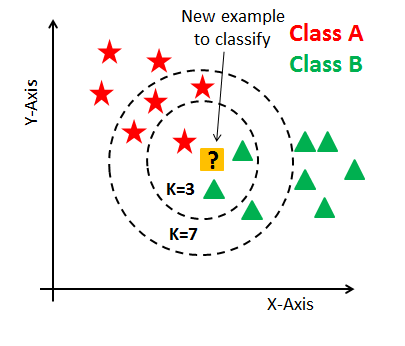

Рекомендации по реализации:
- Используйте `numpy` для представления данных в виде массивов, чтобы минимизировать преобразования.
- Избегайте циклов по всем объектам, по возможности используйте векторизированные операции.
- Обратите внимание на методы [np.linalg.norm()](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html) и [np.argsort()](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html), а также на класс `collections.Counter`.
- Особый плюс, если учтёте обработку возможных ошибок.

In [118]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k:int):
      if k <= 0:
        raise ValueError("k must be a positive integer")
      self.k = k
      self.x_train = None
      self.y_train = None

    def fit(self, X, y):
      if len(X) != len(y):
        raise ValueError("X and y must have the same length")
      self.x_train = np.array(X)
      self.y_train = np.array(y)

    def predict(self, X):
        if self.x_train is None or self.y_train is None:
          raise ValueError("Model must be fitted before prediction")

        X = np.array(X)
        predictions = []

        for sample in X:
            distances = self.count_distance(self.x_train, sample)
            k_indices = np.argsort(distances)[:self.k]

            k_nearest_labels = self.y_train[k_indices]

            most_common = Counter(k_nearest_labels).most_common(1)
            predictions.append(most_common[0][0])

        return np.array(predictions)

    def count_distance(self, x, y):
      return np.sqrt(np.sum((x - y) ** 2, axis=1))


In [119]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [120]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

**Задача 2.2 (0.5 балла)** Протестируйте ваш алгоритм на данных о пингвинах. Выведите лучший получившийся результат на тестовой выборке.

In [127]:
results = {}
for n in [1, 3, 5, 10, 15, 25]:

  knn = KNN(n)
  knn.fit(x_train_scaled, y_train)
  classifiers.append(knn)

  y_train_pred = knn.predict(x_train_scaled)
  y_test_pred = knn.predict(x_test_scaled)

  train_accuracy = accuracy_score(y_train, y_train_pred)
  test_accuracy = accuracy_score(y_test, y_test_pred)

  print(f'{n} соседей: ', train_accuracy, test_accuracy)
  results[n] = (train_accuracy, test_accuracy)

print()
print('Лучший результат:')
print(f'25 соседей: {results[25]}')

1 соседей:  0.9779735682819384 0.7857142857142857
3 соседей:  0.8546255506607929 0.8163265306122449
5 соседей:  0.8414096916299559 0.8367346938775511
10 соседей:  0.8370044052863436 0.8571428571428571
15 соседей:  0.7929515418502202 0.826530612244898
25 соседей:  0.7841409691629956 0.8673469387755102

Лучший результат:
25 соседей: (0.7841409691629956, 0.8673469387755102)


### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [128]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.2 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [130]:

blanks = data.isnull().sum().sum()
blanks
# blanks = 0 => нет пропущенных значений
# есть бессмысленный столбец Unnamed: 0, удалим его

data = data.drop('Unnamed: 0', axis=1)
data




,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**Задача 3.2 (0.2 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Постройте матрицу корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки имеют наибольшую корреляцию с целевой переменной?

In [138]:
corr_data = data.corr(numeric_only=True)['price'].drop('price').sort_values(ascending=False)
corr_data

#наблюдается корреляция цены бриллианта с его размером, весом

,price
carat,0.921591
x,0.884435
y,0.865421
z,0.861249
table,0.127134
depth,-0.010647


**Задача 3.3 (0.2 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные признаки методом OneHot-кодирования (`pd.get_dummies()` или `OneHotEncoder` из `sklearn`).

In [164]:
categorial = data.select_dtypes(['object'])
print(categorial)
# категориальные признаки

data = pd.get_dummies(data, columns=categorial.columns, dtype=int)
data


Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[53940 rows x 0 columns]


,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,...,0,0,0,0,0,1,0,0,0,0


**Задача 3.4 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [168]:
np.random.seed(99)

x = data.drop('price', axis=1)
y = data['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

**Задача 3.5 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче стандартизируйте вещественные признаки в тренировочной и тестовой выборках с помощью `StandardScaler`.

Объясните, как это повлияет на интерпретацию коэффициентов линейной регрессии.

In [169]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

теперь признаки в одном масшиабе, а значит коэффициенты можно сравнивать между собой

**Задача 3.6 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [173]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(x_train_scaled, y_train)

y_train_pred = model.predict(x_train_scaled)
y_test_pred = model.predict(x_test_scaled)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"MSE на тренировочной выборке: {mse_train}")
print(f"MSE на тестовой выборке: {mse_test}")


MSE на тренировочной выборке: 1273519.4242929523
MSE на тестовой выборке: 1285250.4776806855


**Задача 3.7 (0.3 балла)** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [174]:
coefficients = pd.DataFrame({
    'Признак': x_train.columns,
    'Коэффициент': model.coef_
}).sort_values(by='Коэффициент', key=abs, ascending=False)
coefficients

# вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных - carat, x

,Признак,Коэффициент
0,carat,5356.653919
3,x,-1154.424287
21,clarity_SI2,-499.110219
18,clarity_I1,-454.311995
17,color_J,-382.009048
25,clarity_VVS2,271.364630
24,clarity_VVS1,254.694453
16,color_I,-253.078273
19,clarity_IF,248.575308
11,color_D,209.367333


**Задача 3.8 (0.5 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, установив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [176]:
from sklearn.linear_model import Lasso, Ridge

lasso = Lasso(alpha=10)
lasso.fit(x_train_scaled, y_train)

ridge = Ridge(alpha=10)
ridge.fit(x_train_scaled, y_train)

coef_comparison = pd.DataFrame({
    'Признак': x_train.columns,
    'Linear': model.coef_,
    'Lasso': lasso.coef_,
    'Ridge': ridge.coef_
}).sort_values(by='Linear', key=abs, ascending=False)

coef_comparison

,Признак,Linear,Lasso,Ridge
0,carat,5356.653919,4863.320842,5316.704740
3,x,-1154.424287,-681.317285,-1109.157918
21,clarity_SI2,-499.110219,-586.693071,-498.986101
18,clarity_I1,-454.311995,-470.999994,-453.844148
17,color_J,-382.009048,-395.736386,-381.210381
25,clarity_VVS2,271.364630,190.585263,271.650358
24,clarity_VVS1,254.694453,186.077380,255.225095
16,color_I,-253.078273,-278.945456,-252.377489
19,clarity_IF,248.575308,196.579849,248.971703
11,color_D,209.367333,147.211585,209.108887


веса изменились незначительно, проблема мультиколлениарности присутствует - вес x завышен из-за корреляции с carat

**Задача 3.9 (0.5 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод сильнее снижает норму коэффициентов? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.529e+08, tolerance: 5.974e+07
  model = cd_fast.enet_coordinate_descent(


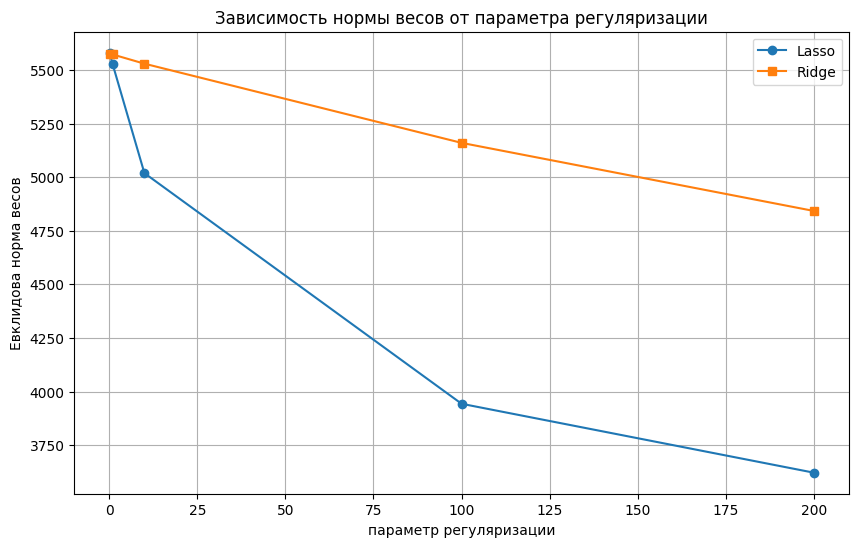

In [179]:
alphas = [0.1, 1, 10, 100, 200]
lasso_norms = []
ridge_norms = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_train_scaled, y_train)
    lasso_norms.append(np.linalg.norm(lasso.coef_))

    ridge = Ridge(alpha=alpha)
    ridge.fit(x_train_scaled, y_train)
    ridge_norms.append(np.linalg.norm(ridge.coef_))

plt.figure(figsize=(10, 6))
plt.plot(alphas, lasso_norms, 'o-', label='Lasso')
plt.plot(alphas, ridge_norms, 's-', label='Ridge')
plt.xlabel('параметр регуляризации')
plt.ylabel('Евклидова норма весов')
plt.title('Зависимость нормы весов от параметра регуляризации')
plt.legend()
plt.grid()
plt.show()

получается, что в данном случае метод Lasso сильнее снижает норму коэффициентов
часто используется для отбора признаков, так как добавляет в функцию потерь штраф за абсолютные значения весов, что приводит к занулению незначимых признаков

**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

**Задача 3.11 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

**Задача 3.12 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.